## Assignment #4: Ising Model
## PHYS481 FALL2020
## Yauheni Kalionau (30062335)

In [1]:
import numpy as np
import itertools as it
from astropy.table import Table
import timeit
import matplotlib.pyplot as plt

## Introduction:
The following lab explores the phenomena of ferromagnetism and phase transitions. The Ising Model coupled with Metropolis algorithm principles are used as a basis for such studies. The first part of this report explores all possible states for a system of N dipoles, where each dipole has a spin of +/-1. The second part is the direct application of the Ising Model and analysis of its consequences. More information about each step is given in a form of short paragraphs before/after relevant code blocks.

## Question 1: 
### a function to calculate all of the energy states and probabilities for an arbitrary number of dipoles.

In [3]:
def enprob(N, beta, B):

   '''
   The function calculates all 
   possible energy and probability states
   for an arbitrary number 'N' of 
   independent dipoles.
   '''

   #creating an array, which contains all
   #possible (+1/-1)'s for a given N.
   shape = []

   #Filling 'shape' array with all (+1/-1)'s
   #(The formula in the range() brackets
   #calculates the total number of (+1/-1)'s):
   for i in range(2**(N-1)*N):
      shape.append(-1)
      i =+ 1
      shape.append(1)
   
   #I am utilizing 'permutations'
   #function from 'itertools' package
   #to find all possible combinations
   #(but will have to sort repeating 
   #ones out later):
   allstates = it.permutations(shape, N)

   #Now I have to convert 'iterator'
   #in the list and to sort out combi-
   #nations that repeat themselves:
   allstates = list(set(allstates))

   #Finally, calculating energy and
   #probabilities for a given state:
   energy = []
   for elem in allstates:
      energy.append(-B*np.sum(elem))

   partit = []
   for elem in energy:
      partit.append(np.exp(beta*elem))

   probs = []  
   for elem in energy:
      probs.append(np.exp(-beta*elem)/np.sum(partit))

   return energy, probs, allstates

In [4]:
#Here you can specify the total number
#of independent dipoles and call 
#the function (takes a lot of time
#for large N's, so select carefully):
N = 3
energy, probs, allstates = enprob(N, 0.1, 2)

#Just printing the output of the function to see that everything is reasonable:
print("List with all energy states and its size:", energy, ",", str(len(energy)))
print("List with all distinct energy states and its size:", set(energy), ",", len(set(energy)))
print("List with all probabilities:", probs)


List with all energy states and its size: [2, -2, 6, -2, 2, 2, -2, -6] , 8
List with all distinct energy states and its size: {2, -6, -2, 6} , 4
List with all probabilities: [0.09641960205666028, 0.14384114368486886, 0.06463199208935855, 0.14384114368486886, 0.09641960205666028, 0.09641960205666028, 0.14384114368486886, 0.214585770686054]


In [5]:
#Tabulating results (change N above):
rows = []
for i in range(len(energy)):
    inter_list= []
    for j in range(1):
        inter_list.append(allstates[i])
        inter_list.append(energy[i])
        inter_list.append(probs[i])
    rows.append(inter_list)

#Constructing rows$columns for the final table:
arr = np.array(rows)
table = Table(arr, names=('Dipoles','Energy','Probability'))
print(table)

  Dipoles    Energy     Probability    
------------ ------ -------------------
 (-1, 1, -1)      2 0.09641960205666028
  (-1, 1, 1)     -2 0.14384114368486886
(-1, -1, -1)      6 0.06463199208935855
  (1, -1, 1)     -2 0.14384114368486886
 (-1, -1, 1)      2 0.09641960205666028
 (1, -1, -1)      2 0.09641960205666028
  (1, 1, -1)     -2 0.14384114368486886
   (1, 1, 1)     -6   0.214585770686054


### The piece of code above was partially inspired by:https://stackoverflow.com/questions/39948902/how-to-generate-all-possible-combinations-of-0-1-matrix-in-python/39948977. However, I wrote it myself completely, but decided that a quick reference to the source of inspiration should also be given.

## Question 2:
A function to calculate Boltzman random state (probability) for an arbitrary number N of independent dipoles. I am going to utilize the function I have wrote for the question 1, since those two are closely related (just minor adjustments needed). The function below calculates all possible probabilities for given N, beta and B; then it randomly choses just one probability state out of all possible.

In [9]:
def boltzmannrs(N, beta, B):

   '''
   The function calculates Boltzmann
   random state for an arbitrary 
   number N of independent dipoles.
   '''

   #creating an array, which contains all
   #possible (+1/-1)'s for a given N.
   shape = []

   #Filling 'shape' array with all (+1/-1)'s
   #(The formula in the range() brackets
   #calculates the total number of (+1/-1)'s):
   for i in range(2**(N-1)*N):
      shape.append(-1)
      i =+ 1
      shape.append(1)
   
   #I am utilizing 'permutations'
   #function from 'itertools' package
   #to find all possible combinations
   #(but will have to sort repeating 
   #ones out later):
   allstates = it.permutations(shape, N)

   #Now I have to convert 'iterator'
   #in the list and to sort out combi-
   #nations that repeat themselves:
   allstates = list(set(allstates))

   #Finally, calculating energy and
   #probabilities for a given state:
   energy = []
   for elem in allstates:
      energy.append(-B*np.sum(elem))

   partit = []
   for elem in energy:
      partit.append(np.exp(beta*elem))

   probs = []  
   for elem in energy:
      probs.append(np.exp(-beta*elem)/np.sum(partit))

   #From my understanding, the function
   #is supposed to return the random
   #probability state from a list of
   #all probabilities for a given
   #number of dipoles:

   return np.random.choice(probs)


## Using "timeit()" function to find the execution time of "boltzmannrs()" function for different N's.

In [7]:
#Using function "boltzmann(...)" to loop through different number N of independent dipoles and then plot time required to execute the function as a function of N:
N = 75
ndip = [i for i in range(N)]
exetime = []
for N in range(N):
    exe_time = """def boltzmannrs(N, beta, B):

   #creating an array, which contains all
   #possible (+1/-1)'s for a given N.
   shape = []

   #Filling 'shape' array with all (+1/-1)'s
   #(The formula in the range() brackets
   #calculates the total number of (+1/-1)'s):
   for i in range(2**(N-1)*N):
      shape.append(-1)
      i =+ 1
      shape.append(1)
   
   #I am utilizing 'permutations'
   #function from 'itertools' package
   #to find all possible combinations
   #(but will have to sort repeating 
   #ones out later):
   allstates = it.permutations(shape, N)

   #Now I have to convert 'iterator'
   #in the list and to sort out combi-
   #nations that repeat themselves:
   allstates = list(set(allstates))

   #Finally, calculating energy and
   #probabilities for a given state:
   energy = []
   for elem in allstates:
      energy.append(-B*np.sum(elem))

   partit = []
   for elem in energy:
      partit.append(np.exp(beta*elem))

   probs = []  
   for elem in energy:
      probs.append(np.exp(-beta*elem)/np.sum(partit))

   #From my understanding, the function
   #is supposed to return the random
   #probability state from a list of
   #all probabilities for a given
   #number of dipoles:

   return np.random.choice(probs)"""
    
    exetime.append(timeit.timeit(exe_time))



## Plotting time required to execute the function as a function of N:

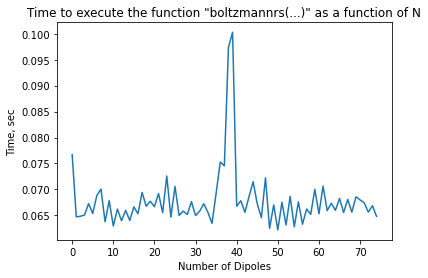

In [8]:

plt.plot(ndip, exetime, label='time')
plt.title('Time to execute the function "boltzmannrs(...)" as a function of N')
plt.xlabel('Number of Dipoles')
plt.ylabel('Time, sec')
plt.show()

## Discussion of the plot:
The plot of execution time vs. the number of dipoles doesn't have a clear pattern of evolution. For example, running the previous piece of code, the one that measures execution time, produces completely inconsistent results and I failed to identify the reason for such discrepancy (try running the piece of code that finds the execution time and then plot the result - you will see that the graph for some undetermined reason always looks different). Sometimes, the spikes tend to be concentrated near lower values of N, sometimes near higher. Such volatility might be due to flaws in the "timeit()" function, such as a potential influence of random numbers stored in the memory or due to background applications of OS that take up a significant portion of memory. However, the primary trend looks to be in the uprise (can be shown by drawing a trendline) despite being obscured by the high amount of noise, but at high N values, the code runs quite slowly so I recommend that you run it up to N = 75.

## Question 3: 
Application of Metropolis algorithm to generate a sequence of states for a single dipole with the following features of the system: T=300K, dE=0.01, 0.1, 1, 10eV. First of all, the probabilities are calculated via direct application of Metropolis principles. Then, I calculate probabilities manually and compare computed vs. manual by plotting them on the same graph.

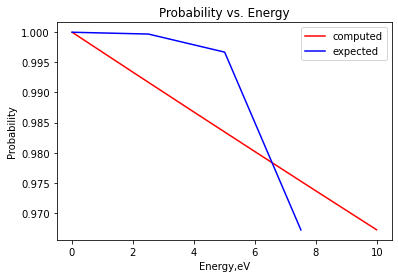

In [11]:
N = 2
dE = [0.01,0.1,1,10] 
#dE = np.arange(0.01,1000,250) #In case if you'd like to try a bigger sample of data points.
T = 300 
shape = []
for i in range(2**(N-1)*N):
    shape.append(-1)
    i =+ 1
    shape.append(1)

#Calculating expected probability values
#using Metropolis algorithm: 
exp_probs = []
for energy in dE:
    p = min(1, np.exp(-energy/T))
    exp_probs.append(p)

#Manually computing probabilities
#for each energy step (100 iter):
computed = []
niter = 1000
for i in np.arange(0.01, 10, 10/niter):
    p = np.exp(-i/T)
    computed.append(p)

plt.plot(np.arange(0.01,10,0.01), computed, color='red')
plt.plot(np.arange(0.01,10,10/len(dE)), exp_probs, color='blue')
plt.title('Probability vs. Energy')
plt.xlabel('Energy,eV')
plt.ylabel('Probability')
plt.legend(['computed','expected'])
plt.show()

## Discussion:
## For 1000 iterations the probability to generate a particular state of a single dipole decreases exponentially with energy (this isn't obvious, but if you extend the sample size of energy change to 0-100+ eVs you will see that the red line is actully an exponential curve). However, the probability of a particular state calculated via application of the Metropolis algorithm yields a probability distribution that looks like a curve that does not coincide with expected at least for small energy values, but it begins to approach "manual" curve as soon as energy is big enough (>10eV). If the sample size of data points is increased to the point when it essentially becomes of the same size as the sample size used for manual calculations, the resulting curve produced by the Metropolis algorithm approaches the manually computed curve.

## Question 4: 1D Ising Model.
## Python code to evolve a system of N dipoles into a ring using Metropolis algorithm (arbitrary N,B,T,J). Credit given to Dr. Brian Jackel for function 'spinflip()'. Detailed description of the principles on which the function is based is provided in a form of comments along the lines.

In [12]:
#Setting N,B,T,J values:
N = 3
B = 2
T = 300
J = 1.0

#Creating an arbitrary array:
shape = []
for i in range(2**(N-1)*N):
    shape.append(-1)
    i =+ 1
    shape.append(1)


states = list(set(it.permutations(shape, N)))

#Picking up random state from all
#possible states:
randind = np.random.choice(2**N, size=1)         #Choosing random index number
index = int(randind[0])                          #Converting it to integer
randstate = states[index:index+1]                #choosing an element from the list with randomly chosen index
state0 = randstate[0]

#Energy for a randomly chosen
#state (based on J-Coupling constant):
def hamilt_energy(state):

    """The function calculates 
    Hamiltonian, i.e. energy
    for a given state ('elem').
    """
    
    elem = state
    steplist = []
    for i in elem:
        if i == elem[len(elem)-1]:
            step = i*elem[len(elem)-2]
            steplist.append(step)
        if i == elem[0]:
            step = i*elem[1]
        elif ((i != elem[len(elem)-1]) and (i != elem[0])):
            ind = elem.index(i)
            step = i*(elem[ind+1]) + i*(elem[ind-1])
            steplist.append(step)

    #Hamiltonian calculation:
    hamilt_en = -J*np.sum(steplist)
    return hamilt_en

def spinflip(nearspins, J, B, T):
    
    """
    Flips the spin of a specific dipole
    with an arbitrary J, B, T.
    """

    nspins = len(nearspins)   #; print(nspins)
    local_field = J*nspins + B
    
    probability_plus = 1.0 / (1.0 + np.exp(-2*local_field/T) )
    spin_up = probability_plus > np.random.rand(nspins)
    
    return 2*spin_up - 1


#Implementing Metropolis Algorithm:
def metrostep(state, niter):
    current_state = state                                  #Initial state of N dipoles, chosen randomly
    for i in range(niter):
        test = spinflip(current_state, J, B,T)              #Flipping spin
        current_state = list(test)
        energy_change = hamilt_energy(current_state)        #Calculating energy change after spin is flipped
        randnum = np.random.random(1)                       #Choosing random number in between (0,1)
        if randnum < min(1, np.exp(-energy_change/T)):      #Comparing random number to the expected probability
            return current_state

niter = 10        
for i in range(niter):
    result = metrostep(state0, niter)
    print("Evolution of system of", N,"dipoles. Current state:", str(result)+".","At step number (generation):",i)


Evolution of system of 3 dipoles. Current state: [-1, 1, 1]. At step number (generation): 0
Evolution of system of 3 dipoles. Current state: [-1, -1, -1]. At step number (generation): 1
Evolution of system of 3 dipoles. Current state: [1, -1, -1]. At step number (generation): 2
Evolution of system of 3 dipoles. Current state: [-1, 1, 1]. At step number (generation): 3
Evolution of system of 3 dipoles. Current state: [-1, 1, -1]. At step number (generation): 4
Evolution of system of 3 dipoles. Current state: [-1, -1, 1]. At step number (generation): 5
Evolution of system of 3 dipoles. Current state: [1, 1, -1]. At step number (generation): 6
Evolution of system of 3 dipoles. Current state: [-1, 1, 1]. At step number (generation): 7
Evolution of system of 3 dipoles. Current state: [-1, -1, 1]. At step number (generation): 8
Evolution of system of 3 dipoles. Current state: [1, 1, -1]. At step number (generation): 9


## Question 5: Ising Model. 
## Credit given to Dr. Brian Jackel for functions 'ising_model()' and 'ising_step()'. The piece of code below applies the Ising Model on a 51x49 grid for an arbitrary J and B. It is assumed that the grid is essentially randomized after 20 sweeps and thermalized after about 200 sweeps.

In [13]:
#Function that applies Ising Model algorithm on a grid:
def ising_model(grid, J, B, T, nsteps=1, plot=True):    

    """This function implements Ising Model
    on the nxm grid with arbirtrary J,B,T.
    """

    nx, ny = grid.shape
    nsites = int( 0.05 * grid.size )

    if plot:
        fig = plt.gcf()
        ims = plt.imshow(grid)

    M = []  # magnetization        
    for indx in range(nsteps): 
        M.append( np.sum(grid)/np.size(grid) ) 
        
        # successive grids may be corelated, so skip a few
        for nsteps in range(9):
            grid = ising_step(grid, nsites=nsites, J=J, B=B, T=T)    
            
        if plot:
            ims.set_data(grid) #; print(np.sum(grid)/grid.size)
            fig.canvas.draw() ; fig.canvas.flush_events() ; #fig.canvas.show()

    return grid, M

#Function to calculate just one step of Ising Model:
def ising_step(grid, nsites=1, J=1.0, B=0.0, T=0.5):

    """ Pick one or more sites at random, count the neighbours, 
    and apply flips.
    """

    nx, ny = grid.shape

    # pick some random grid location(s)
    xx = (np.random.rand(nsites)*nx).astype(np.int)
    yy = (np.random.rand(nsites)*ny).astype(np.int) 

    # count neighboring spins, taking care to wrap as needed
    nn = grid[xx,(yy+1)%ny] + grid[xx,yy-1] + grid[(xx+1)%nx,yy] + grid[xx-1,yy]
    grid[xx,yy] = spinflip(nn, J, B, T)    
    
    return grid.copy()

In [14]:
def gridcalc():
    
    """
    The function simply returns
    an array of size 51x49 with some
    sites populated with spin = -1,
    other with spin = 1
    """
    
    #Specifying size of an input array:
    nx = 51
    ny = 49

    #Creating the meshgrid:
    grid0 = np.ndarray(shape=(nx,ny))

    #Populating the input array with an
    #arbitrary arangement of spins:
    for i in range(nx):
        for j in range(ny):
            if i == 0 and j == 0:
                grid0[i,j] = 1
            else: 
                grid0[i,j] = -1
    return grid0

## Implementation of Ising Model based on Metropolis Algorithm for arbitrary J, B, T; 
## and grid plots for B = 0, 0.5, -0.5.

B = 0


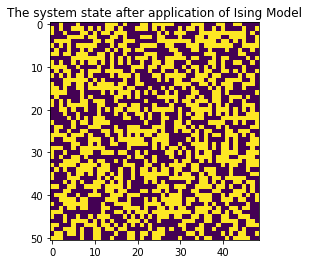

B = 0.5


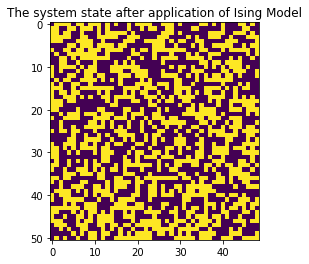

B = -0.5


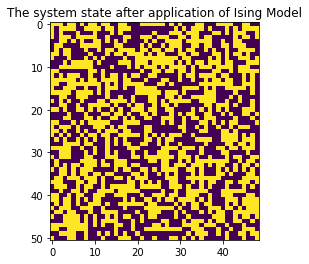

In [20]:
#Set up variables:
J = 1.0
B = 2.0
T = 300
k_b = 1.38e-23

#Set up number of sweeps(niter):
niter = 20

#Applying the algorithm for different
#values of B:
grid0 = gridcalc()                                                           #creating a grid by calling relevant function
for B in [0,0.5,-0.5]:
    J = k_b*B*T
    for i in range(niter):
        grid, M = ising_model(grid0, J, B, T)
        grid0 = grid
    plt.title("The system state after application of Ising Model")
    print("B =",B)
    plt.show()

## Plotting average magnetization for B = 0 and J/(kTB) = range(0.0,0.6,21) as a function of H = J/(kTB), where H is a completely arbitrary variable name chosen for the sake of convenience.

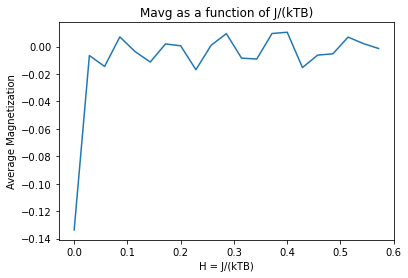

In [16]:
#Function to calculate magnetization (H = J/(kTB)):
def magnetization(grid, H):

    """
    Calculates the average magnetization
    of the grid/site
    """

    nsites = int( 0.05 * grid.size )
    M = []
    for i in range(niter):
        M.append( np.sum(grid)/np.size(grid) ) 
        for nsteps in range(9):
            grid = ising_step(grid, nsites=nsites, J=J, B=B, T=T)
    Mavg = np.sum(M)/len(M)
    return grid, Mavg

#Let J/(kTB) = H:
grid0 = gridcalc()
M_list = []
H_list = []
nsteps = 21
for H in list(np.arange(0.0,0.6,0.6/nsteps)):
    grid, Mavg = magnetization(grid0, H)
    M_list.append(Mavg)
    H_list.append(H)
    grid0 = grid
plt.plot(H_list, M_list)
plt.title("Mavg as a function of J/(kTB)")
plt.ylabel("Average Magnetization")
plt.xlabel("H = J/(kTB)")
plt.show()



## A grid plot for J = kBT.

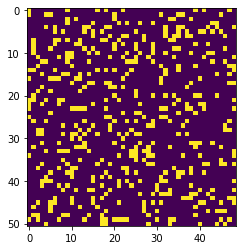

In [24]:
B = 2.0
T = 300
k_b = 1.38e-23
J = k_b*B*T
grid0 = gridcalc()
grid = ising_model(grid0, J, B, T)
plt.show()


## Discussion: 
One of the questions in the assignment was asking to produce a hysteresis curve. However, I did not find any information about hysteresis curves on the file with instructions provided by Dr. Brian Jackel, so I have no idea what the question is asking for (the internet didn't clarify the point either). Anyways, the Ising Model is a convenient way of describing the phenomena of ferromagnetism, especially if we consider a lattice where each site is populated by a particle with a spin +1 or -1. The 2D Ising model is one of the simplest ways to represent reality and study phase transitions, and that's important for certain areas of science. It is interesting to note that after a certain number of iterations the system of dipoles evolves to the point where it becomes seemingly organized, with particles grouped according to the value of their spin (+1 together, -1 also together). Most computations in this lab were based on the Metropolis Algorithm, which is based on the premise that the system will continue evolving if we the "probability of acceptance/rejection" of certain physical features is high enough (specified by the user). The results of the lab support the Ising Model because it was shown that indeed the system of N diploes is capable of reaching the state when the spins of dipoles become organized and seem to form an observable pattern. The Ising model is simply a convenient way to study ferromagnetism.